<a href="https://colab.research.google.com/github/EAFIT-BI/Supervised-Learning-2024-II/blob/main/%C3%81rboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles como clasificadores

In [98]:
import pandas as pd

In [99]:
df = pd.read_csv('/content/wdbc.data', header = None)

In [100]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [101]:
cols = ['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
        'concavity_mean', 'concave_points_mean', 'simmetry_mean', 'fractal_dim_mean', 'radius_sd', 'texture_sd', 'perimeter_sd',
        'area_sd', 'smoothness_sd', 'compactness_sd', 'concavity_sd', 'concave_points_sd', 'simmetry_sd', 'fractal_dim_sd',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
        'concavity_worst', 'concave_points_worst', 'simmetry_worst', 'fractal_dim_worst']

df.columns = cols

In [102]:
# Fijamos el ID como el índice de la tabla
df.set_index('ID', inplace=True)
# Observamos la generalidad de las características para mirar la integridad de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diagnosis             569 non-null    object 
 1   radius_mean           569 non-null    float64
 2   texture_mean          569 non-null    float64
 3   perimeter_mean        569 non-null    float64
 4   area_mean             569 non-null    float64
 5   smoothness_mean       569 non-null    float64
 6   compactness_mean      569 non-null    float64
 7   concavity_mean        569 non-null    float64
 8   concave_points_mean   569 non-null    float64
 9   simmetry_mean         569 non-null    float64
 10  fractal_dim_mean      569 non-null    float64
 11  radius_sd             569 non-null    float64
 12  texture_sd            569 non-null    float64
 13  perimeter_sd          569 non-null    float64
 14  area_sd               569 non-null    float64
 15  smoothness_sd        

In [103]:
# Revisamos el balanceo de las clases
df.Diagnosis.value_counts()

,count
Diagnosis,
B,357
M,212


In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Hacemos la partición de los datos
# Separamamos la etiqueta de los datos
X = df.drop('Diagnosis', axis=1)
y = df.Diagnosis
# Hacemos la partición entrenamiento/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

In [105]:
from sklearn.metrics import f1_score # dado el desbalanceo de clases

# Instanciamos el modelo por defecto
model = DecisionTreeClassifier()
# Entrenamos el modelo
model.fit(X_train, y_train)
# Calculamos el f1-score para entrenamiento y para validación
train_score = f1_score(y_train, model.predict(X_train), average = 'weighted')
test_score = f1_score(y_test, model.predict(X_test), average = 'weighted')
# Visualizamos las métricas calculadas
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')

Train score: 1.0
Test score: 0.9073678866879744


In [106]:
# Imprimimos el reporte del entrenamiento
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       250
           M       1.00      1.00      1.00       148

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



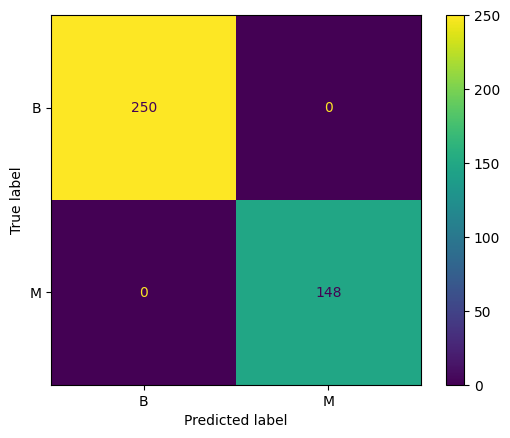

In [107]:
# Visualizamos la matriz de confusión de entrenamiento
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay.from_estimator(model, X_train, y_train);

In [108]:
# Realizamos el mismo procedimiento de visualización de métricas para el test
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           B       0.96      0.89      0.92       107
           M       0.83      0.94      0.88        64

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171



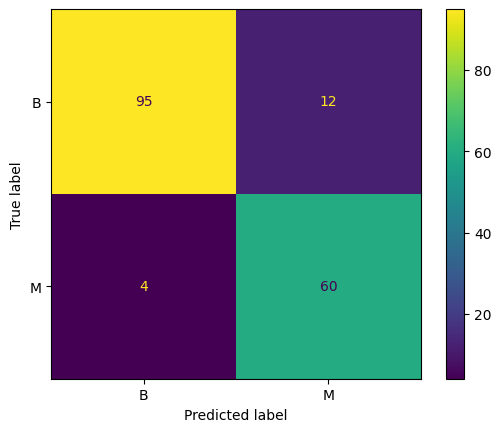

In [109]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [110]:
# Vamos a visualizar la estructura del árbol
from sklearn.tree import export_text

# Estructura
print(export_text(model, feature_names=list(X.columns.values)))

|--- concave_points_mean <= 0.05
|   |--- area_worst <= 957.45
|   |   |--- area_sd <= 45.17
|   |   |   |--- smoothness_worst <= 0.18
|   |   |   |   |--- perimeter_worst <= 112.65
|   |   |   |   |   |--- class: B
|   |   |   |   |--- perimeter_worst >  112.65
|   |   |   |   |   |--- concave_points_mean <= 0.03
|   |   |   |   |   |   |--- class: M
|   |   |   |   |   |--- concave_points_mean >  0.03
|   |   |   |   |   |   |--- class: B
|   |   |   |--- smoothness_worst >  0.18
|   |   |   |   |--- class: M
|   |   |--- area_sd >  45.17
|   |   |   |--- compactness_mean <= 0.06
|   |   |   |   |--- class: M
|   |   |   |--- compactness_mean >  0.06
|   |   |   |   |--- class: B
|   |--- area_worst >  957.45
|   |   |--- fractal_dim_mean <= 0.05
|   |   |   |--- class: B
|   |   |--- fractal_dim_mean >  0.05
|   |   |   |--- class: M
|--- concave_points_mean >  0.05
|   |--- concave_points_worst <= 0.10
|   |   |--- class: B
|   |--- concave_points_worst >  0.10
|   |   |--- area_wo

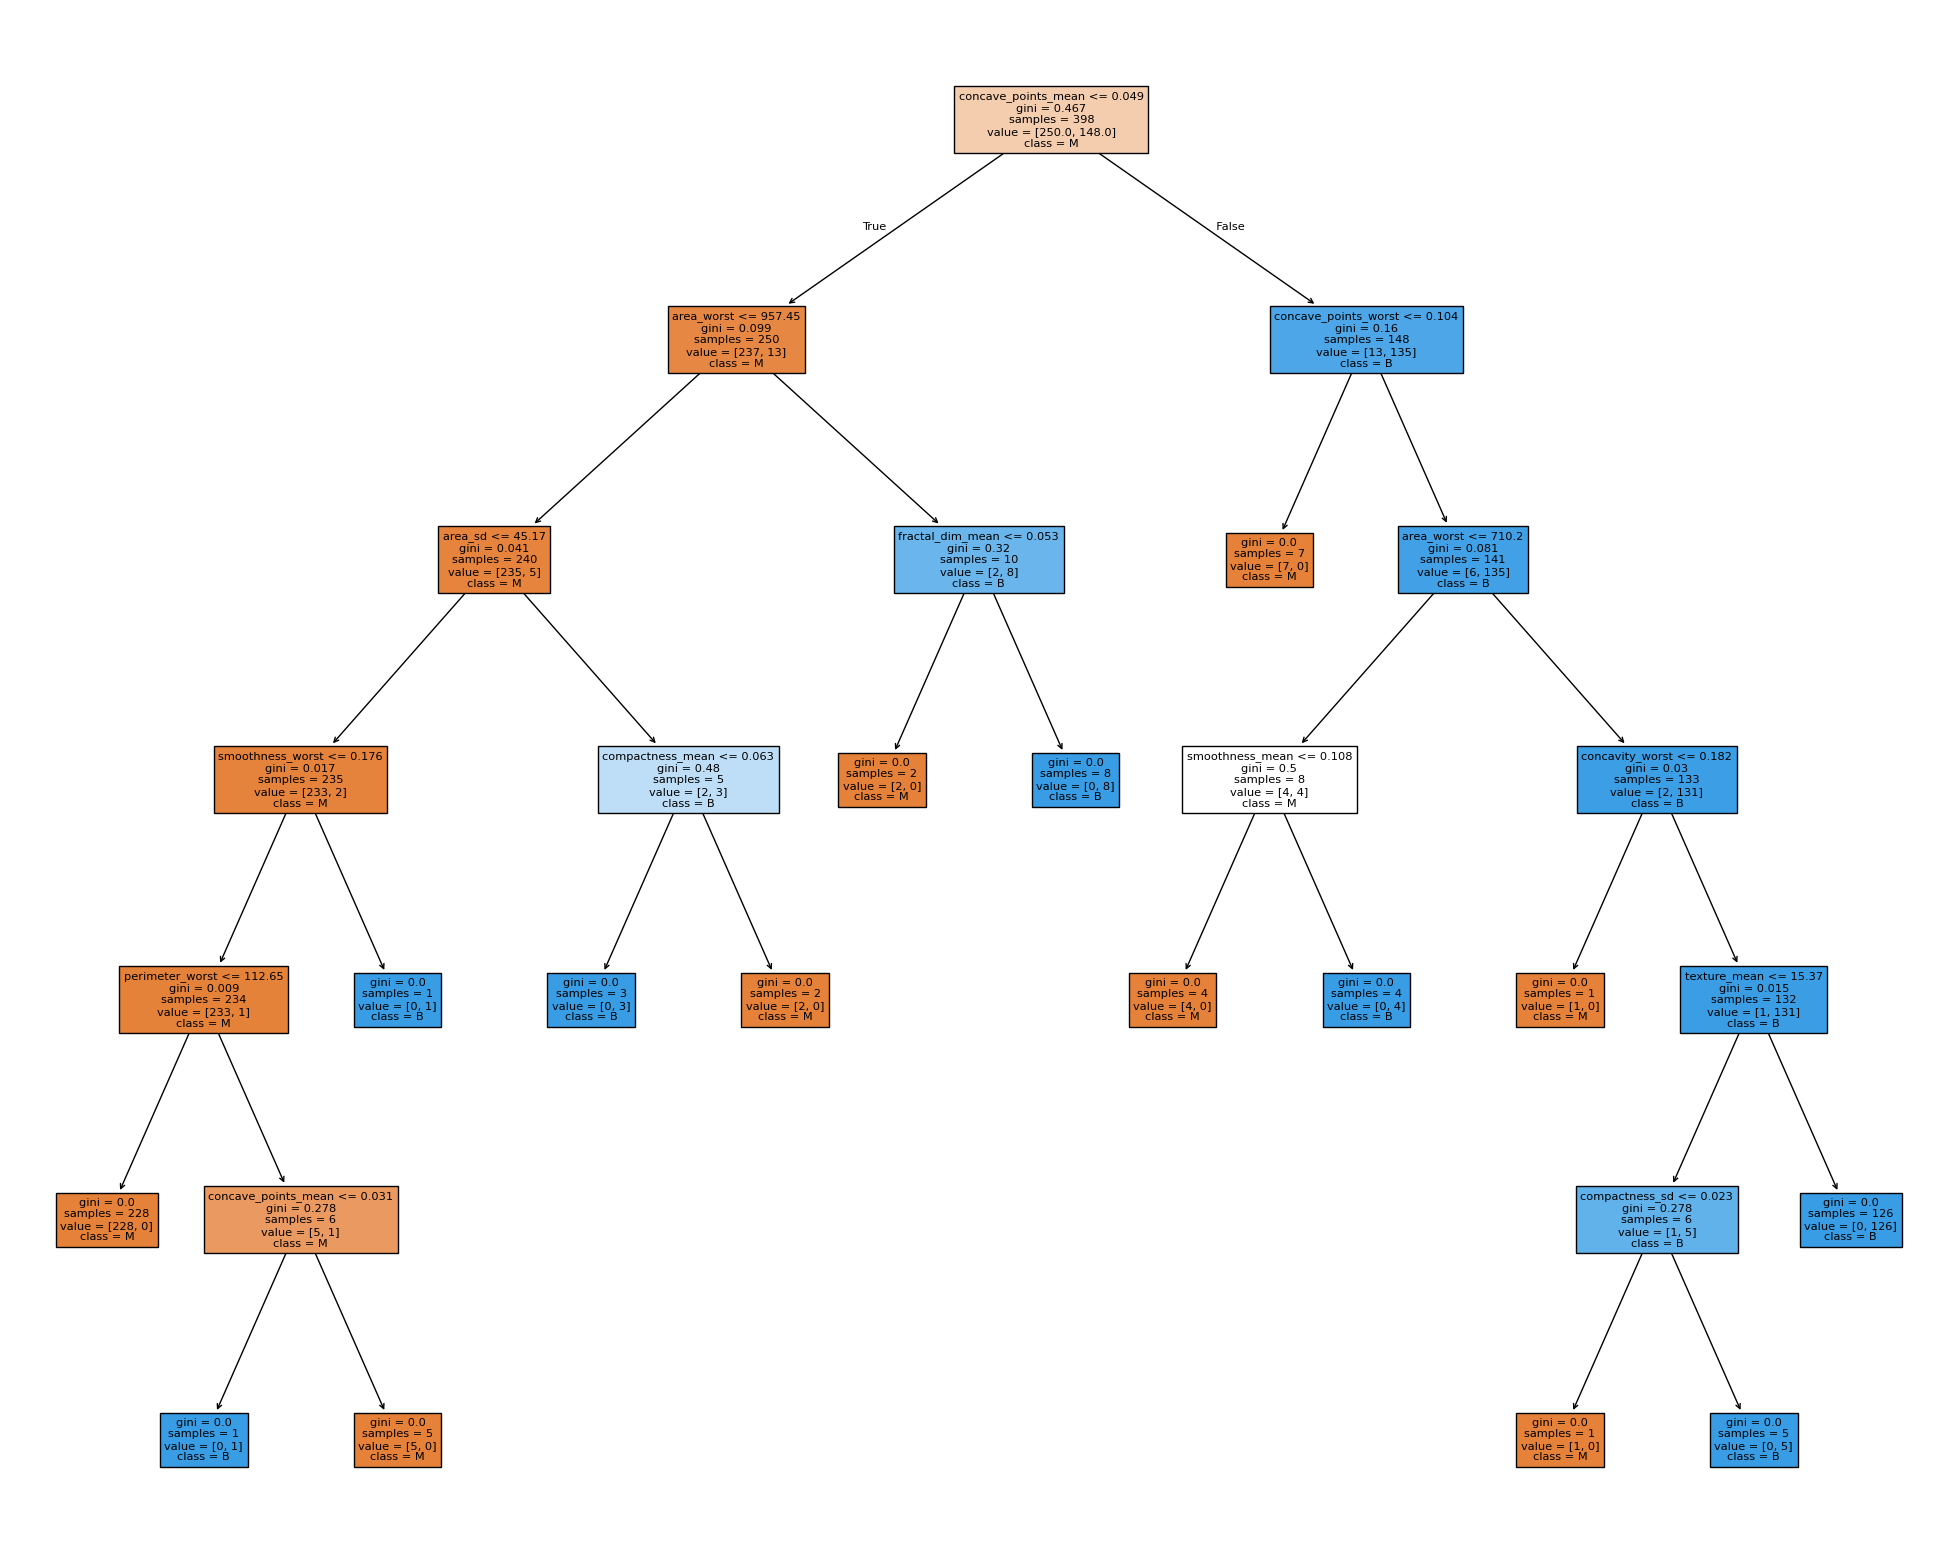

In [111]:
import matplotlib.pyplot as plt
from sklearn import tree

# Gráfico del árbol
plt.figure(figsize=(25,20))
tree.plot_tree(model, feature_names = X.columns, class_names = y.unique(), filled=True);

# Prunning

## Factor de complejidad ccp_alpha (post)

In [112]:
# Cargamos las librerías que necesitamos para ajustar el hiperparámetro

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.preprocessing import LabelEncoder

# Instanciamos el codificador de etiqueta
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

# Generamos los valores para la búsqueda del ccp_alpha
dist = {'ccp_alpha': loguniform(0.001, 10)}
# Hacemos la sintonización del hiperparámetro
search = RandomizedSearchCV(DecisionTreeClassifier(), dist, scoring = 'f1_weighted')
# Entrenamos el modelo con el hiperparámetro sintonizado
search.fit(X_train, y_train_le)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'ccp_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d03e7277010>},
                   scoring='f1_weighted')

In [113]:
# Calculamos las métricas en el test
test_score = f1_score(y_test_le, search.best_estimator_.predict(X_test), average = 'weighted')
# Visualizamos las métricas calculadas
print(f'Test score: {test_score}')


Test score: 0.8674822195054939


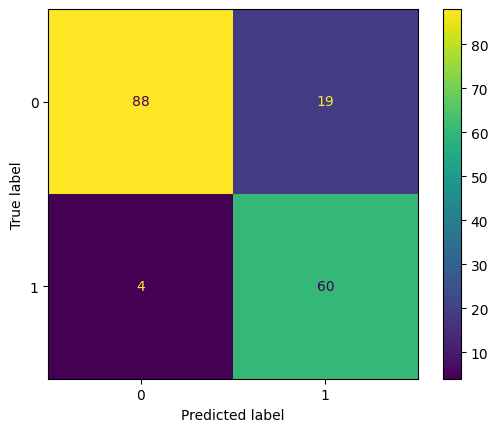

In [114]:
# Observemos la matriz de confusión
ConfusionMatrixDisplay.from_estimator(search.best_estimator_, X_test, y_test_le);

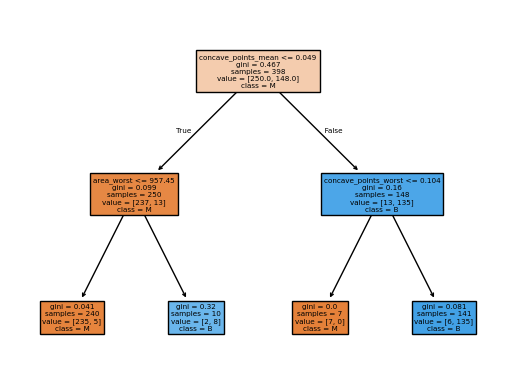

In [115]:
# Gráfico del árbol
#plt.figure(figsize=(25,20))
tree.plot_tree(search.best_estimator_, feature_names = X.columns, class_names = y.unique(), filled=True);

## Métodos pre

In [116]:
# Modificamos el máximo nivel de profundidad
from sklearn.model_selection import GridSearchCV
import numpy as np

# Construimos la distribución de la máxima profundidad
grid = {'max_depth': np.arange(3,8)}
# Realizamos la búsqueda
grid_search = GridSearchCV(DecisionTreeClassifier(), grid, scoring = 'f1_weighted')
# Entrenamos el modelo
grid_search.fit(X_train, y_train_le)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7])},
             scoring='f1_weighted')

In [117]:
# Revisamos el desempeño
print(f'Train score: {grid_search.best_estimator_.score(X_train, y_train_le)}')
print(f'Test score: {grid_search.best_estimator_.score(X_test, y_test_le)}')

Train score: 1.0
Test score: 0.9005847953216374


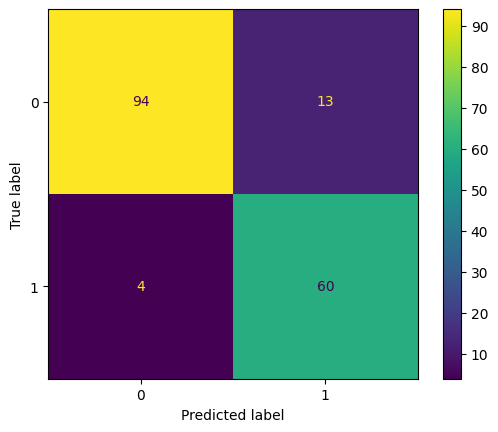

In [118]:
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test_le);

# Importancia de las características

In [120]:
df_importancia = pd.DataFrame({'feature': X.columns,
                               'importance': grid_search.best_estimator_.feature_importances_})

In [ ]:
df_importancia.sort_values('importance', ascending = False)

# Árboles como regresores

In [123]:

# Cargamos el archivo
import pandas as pd
import numpy as npf
import matplotlib.pyplot as plt

carros = pd.read_csv('auto-mpg.data', sep = '\s+', header = None,
                     na_values = ['?'], names = ['mpg', 'cylinders',
                                                 'displacement', 'horsepower',
                                                 'weight', 'acceleration',
                                                 'model_year', 'origin', 'car_name'])


In [124]:
carros.set_index('car_name', inplace = True)
carros.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
car_name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
# Revisamos la integridad de los datos
carros.info()

# Recordar que los árboles funcionan con datasets que tienen datos nulos

In [126]:
# Hacemos las particiones de etiqueta y train_test
X = carros.drop('mpg', axis = 1)
y = carros.mpg
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [129]:
# Implementamos el modelo de la regresión
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Instanciamos el modelo
model = DecisionTreeRegressor(random_state = 1)
# Entrenamos el modelo
model.fit(X_train, y_train)

# Imprimimos las métricas de desempeño
print(f'Train score: {mean_squared_error(y_train, model.predict(X_train))}')
print(f'Test score: {mean_squared_error(y_test, model.predict(X_test))}')

Train score: 0.08812949640287769
Test score: 11.656166666666666


In [ ]:
# Visualizamos la estructura del árbol
print(export_text(model, feature_names=list(X.columns.values)))

In [136]:
# Realizaremos una poda para evitar el sobre-ajuste
dist = {'ccp_alpha': loguniform(1e-3,1e2)}
search = RandomizedSearchCV(DecisionTreeRegressor(random_state = 1), dist, scoring = 'neg_mean_squared_error')
search.fit(X_train, y_train)

# Calculamos las métricas de desempeño
test_score = mean_squared_error(y_test, search.best_estimator_.predict(X_test))
print(f'Test score: {test_score}')
train_score = mean_squared_error(y_train, search.best_estimator_.predict(X_train))
print(f'Train score: {train_score}')

Test score: 10.717751764898633
Train score: 1.1400509518459154


In [ ]:
# Hacemos poda por máxima profundidad
grid = {'max_depth': np.arange(2,8)}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state = 1), grid, scoring = 'neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Calculamos las métricas de desempeño
test_score = mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test))
print(f'Test score: {test_score}')
train_score = mean_squared_error(y_train, grid_search.best_estimator_.predict(X_train))
print(f'Train score: {train_score}')

In [ ]:
print(export_text(grid_search.best_estimator_, feature_names=list(X.columns.values)))

In [140]:
# Hacemos una poda por mínimo de muestras por hoja

grid = {'min_samples_leaf': np.arange(3,8)}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state = 1), grid, scoring = 'neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Calculamos las métricas de desempeño
test_score = mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test))
print(f'Test score: {test_score}')
train_score = mean_squared_error(y_train, grid_search.best_estimator_.predict(X_train))
print(f'Train score: {train_score}')

Test score: 10.835197596563178
Train score: 5.397653210997635
